This compares the 5 different cleaning methods to the original course retentions
I wanted to see how cleaning the students checkin would change the retention for courese on average
The goal of cleaning is to account for miss clicks that can happen when a student checks into the tutoring service

Method1: takes all a students courses and adds their counts to their highest check in course
Method2: takes any non-math course and adds it to the students highest math course
Method3: Adds a students courses with counts <=2 onto their highest course
Method4: Sums all of a students check-ins together and replaces their values to all be the same
Method5: combination of Method2 then Method4

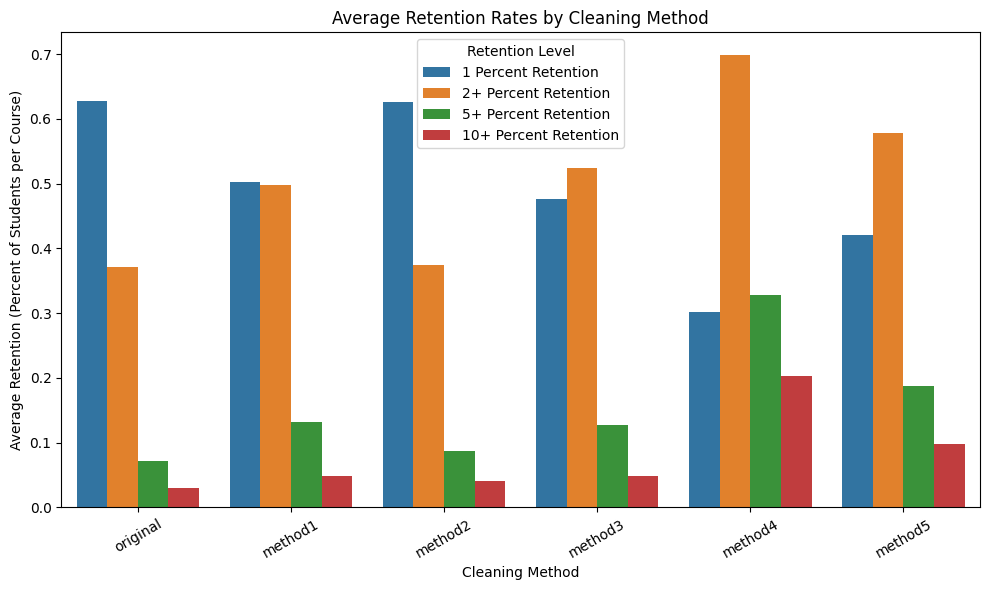

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

files = {
    "original": "../results/course_retention.xlsx",
    "method1": "../results/Retention Cleaning/method1_retention.xlsx",
    "method2": "../results/Retention Cleaning/method2_retention.xlsx",
    "method3": "../results/Retention Cleaning/method3_retention.xlsx",
    "method4": "../results/Retention Cleaning/method4_retention.xlsx",
    "method5": "../results/Retention Cleaning/method5_retention.xlsx",
}

dataframes = []
for name, path in files.items():
    df = pd.read_excel(path)
    df["Method"] = name
    dataframes.append(df)

# Combine into one big DataFrame
combined = pd.concat(dataframes, ignore_index=True)

# Drop the "All Courses" summary row to avoid double-counting
combined = combined[combined["Course Name"] != "All Courses"]
combined.head()

avg_retention = (
    combined.groupby("Method")[[
        "1 Percent Retention", 
        "2+ Percent Retention", 
        "5+ Percent Retention", 
        "10+ Percent Retention"
    ]]
    .mean()
    .reset_index()
)


plt.figure(figsize=(10,6))
avg_retention_melted = avg_retention.melt(id_vars="Method", var_name="Retention Level", value_name="Average Percent")

bar_order = ["original", "method1", "method2", "method3", "method4", "method5"]

sns.barplot(data=avg_retention_melted, x="Method", y="Average Percent", hue="Retention Level", order = bar_order)
plt.title("Average Retention Rates by Cleaning Method")
plt.ylabel("Average Retention (Percent of Students per Course)")
plt.xlabel("Cleaning Method")
plt.xticks(rotation=30)
plt.legend(title="Retention Level")
plt.tight_layout()
plt.show()



In [34]:
avg_retention_2d = (
    avg_retention
    .set_index("Method")
    .reindex(bar_order)  # reorder rows
    .round(3)
)
from IPython.display import display

avg_retention_2d.style.background_gradient(
    cmap="Blues",
    axis=None
)

display(avg_retention_2d)


,1 Percent Retention,2+ Percent Retention,5+ Percent Retention,10+ Percent Retention
Method,,,,
original,0.628,0.372,0.072,0.029
method1,0.502,0.498,0.132,0.049
method2,0.626,0.374,0.087,0.041
method3,0.476,0.524,0.127,0.049
method4,0.301,0.699,0.329,0.203
method5,0.421,0.579,0.188,0.099


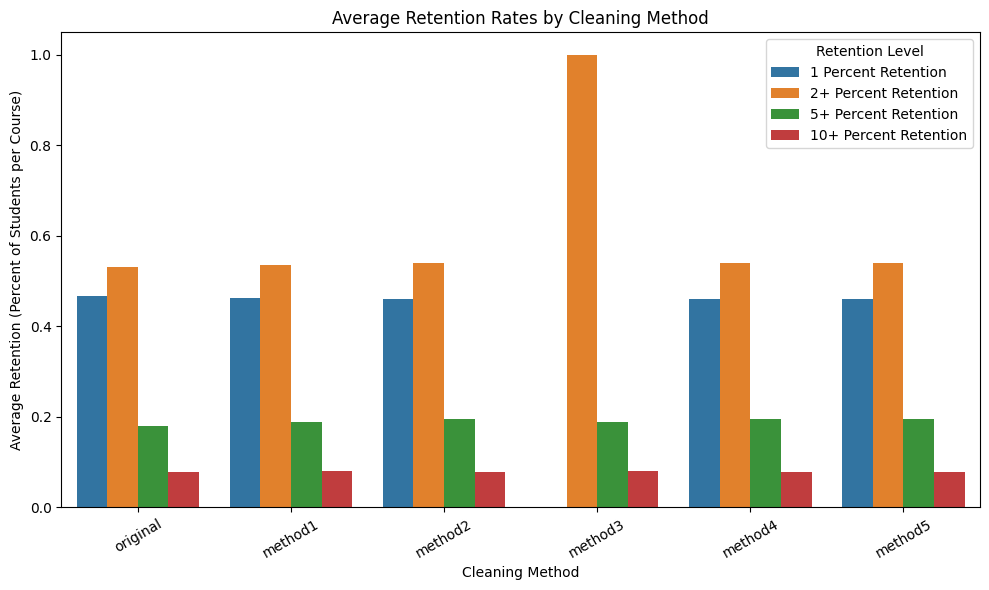

In [36]:
course = "COLLEGE ALGEBRA"

course_retention_analysis = combined[combined["Course Name"] == course].copy()

course_retention_melted = course_retention_analysis.melt(
    id_vars=["Method", "Course Name"],
    value_vars=[
        "1 Percent Retention", 
        "2+ Percent Retention", 
        "5+ Percent Retention", 
        "10+ Percent Retention"
    ],
    var_name="Retention Level",
    value_name="Percent"
)

plt.figure(figsize=(10,6))

bar_order = ["original", "method1", "method2", "method3", "method4", "method5"]

sns.barplot(data=course_retention_melted, x="Method", y="Percent", hue="Retention Level", order = bar_order)
plt.title("Average Retention Rates by Cleaning Method")
plt.ylabel("Average Retention (Percent of Students per Course)")
plt.xlabel("Cleaning Method")
plt.xticks(rotation=30)
plt.legend(title="Retention Level")
plt.tight_layout()
plt.show()